# Week #4 Frequency Domain

In [1]:
!wget -nc 'https://drive.google.com/uc?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG' -O cameraman.tif
!wget -nc 'https://drive.google.com/uc?id=1J_SEj79YhWVcQrQKVEQkBDHroB-LxZgQ' -O moon.png

File ‘cameraman.tif’ already there; not retrieving.


File ‘moon.png’ already there; not retrieving.


In [2]:
# import here
import numpy as np
from scipy import signal
import scipy as sp
import cv2
import matplotlib.pyplot as plt


## Example #1: Signal combinations

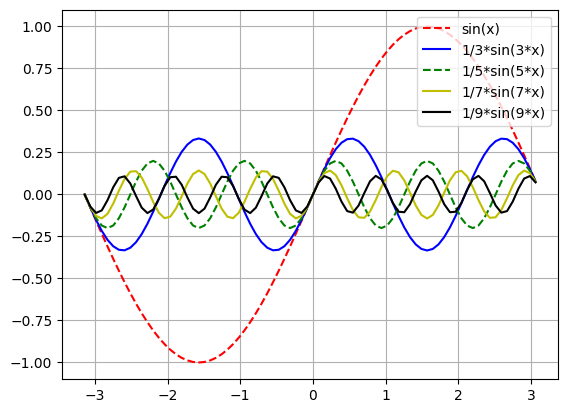

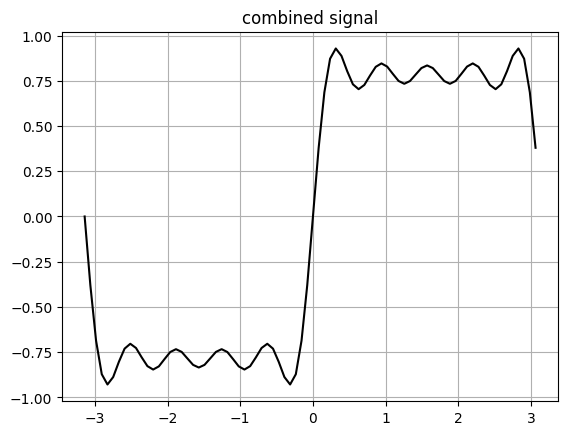

In [3]:
import numpy as np
from matplotlib import pyplot as plt


x = np.arange(-np.pi, np.pi, np.pi/40)
f1 = np.sin(x)
f2 = 1/3*np.sin(3*x)
f3 = 1/5*np.sin(5*x)
f4 = 1/7*np.sin(7*x)
f5 = 1/9*np.sin(9*x)
plt.plot(x, f1, 'r--')
plt.plot(x, f2, 'b')
plt.plot(x, f3, 'g--')
plt.plot(x, f4, 'y')
plt.plot(x, f5, 'black')
plt.legend(('sin(x)', '1/3*sin(3*x)', '1/5*sin(5*x)', '1/7*sin(7*x)', '1/9*sin(9*x)'),
           loc='upper right')

plt.grid(True)
plt.show()



f6 = f1+f2+f3+f4+f5
# f6 = f1 + f2
plt.plot(x, f6, 'black');plt.title("combined signal")
plt.grid(True)
plt.show()




* Conjugate Symmetry

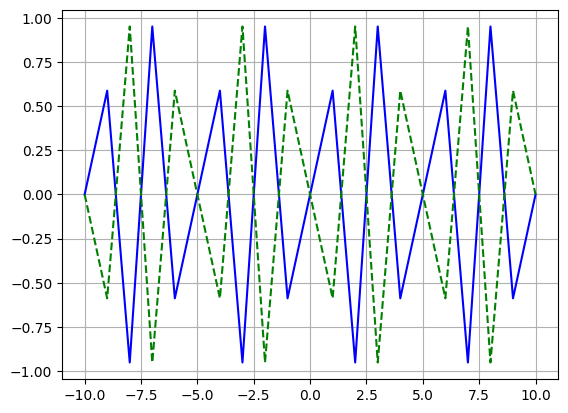

In [4]:
import numpy as np
from matplotlib import pyplot as plt


x = np.arange(-10, 10+1, 1)
f1 = np.sin(2*np.pi*2/5*x)
f2 = np.sin(2*np.pi*3/5*x)
plt.plot(x, f1, 'b')
plt.plot(x, f2, 'g--')

plt.grid(True)
plt.show()

## Example #2 : Fourier Transform
* 2.1 simple image

f =  [[64.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
fshift =  [[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 64.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


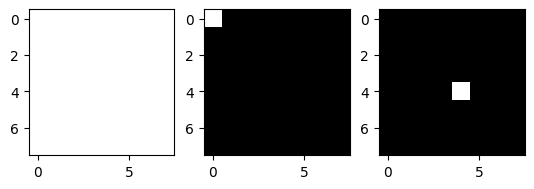

In [5]:
image_simple = np.ones((8,8),dtype=np.uint8)

f = np.fft.fft2(image_simple)
print('f = ',  abs(f)) # fourier spectrum
fshift = np.fft.fftshift(f)
print('fshift = ', abs(fshift))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(image_simple,cmap = 'gray', vmin=0, vmax=1)
ax2.imshow(abs(f), cmap='gray')
ax3.imshow(abs(fshift), cmap='gray')

plt.show()

* 2.2 simple image #2

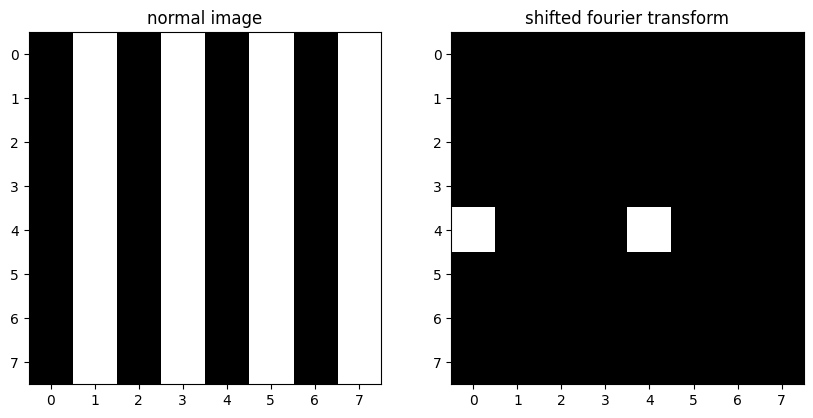

In [6]:
image_simple2 = np.array([(0,200), (0,200)])
image_simple2 = np.tile(image_simple2,(4,4))
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_simple2, cmap='gray')
plt.title('normal image')
f = np.fft.fft2(image_simple2)
fshift = np.fft.fftshift(f)
plt.subplot(1, 2, 2)
plt.title('shifted fourier transform')
plt.imshow(abs(fshift), cmap='gray')
plt.show()

* 2.3 simple image #3

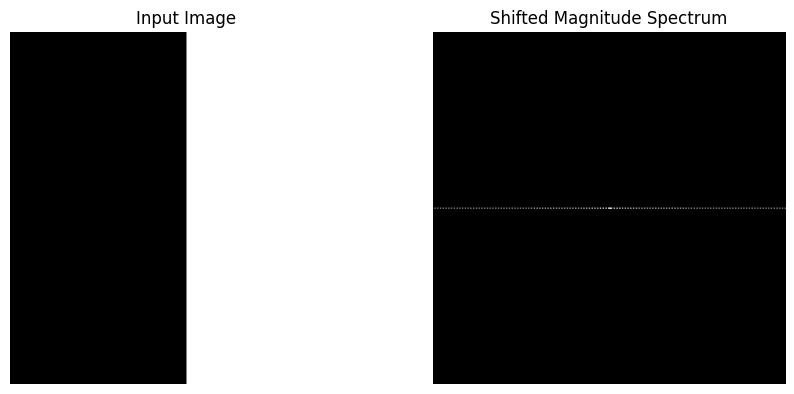

In [7]:
a = np.zeros((256,128),dtype=np.uint8)
b = np.ones((256,128),dtype=np.uint8)
image_simple = np.concatenate((a,b), axis = 1)
f = np.fft.fft2(image_simple)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift)) # fourier spectrum

fig = plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(image_simple.astype(np.uint8), cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum.astype(np.uint8), cmap = 'gray')
plt.title('Shifted Magnitude Spectrum')
plt.axis('off')
plt.show()


* 2.4 simple image #4

In [8]:
def show_image(image_list,
               title_list = None):
    
    n_img = len(image_list)
    for i in range(n_img):
        plt.subplot(1, n_img, i+1)
        plt.imshow(image_list[i], cmap='gray')
        plt.title(title_list[i] if title_list is not None else '')
        plt.axis('off')
    
    plt.show()

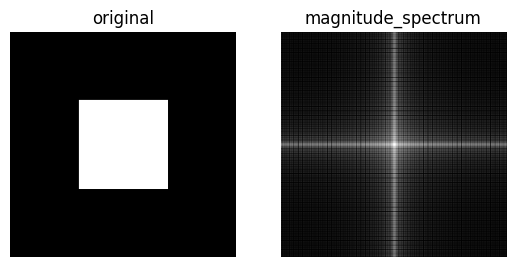

In [9]:
image_simple2 = np.zeros((256,256),dtype=np.uint8)
image_simple2[78:179,78:179] = 1
nx,ny = image_simple2.shape
x = np.linspace(0, nx-1, nx)
y = np.linspace(0, ny-1, ny)
i, j = np.meshgrid(x, y, sparse=True)

f = np.fft.fft2(image_simple2)
f_shifted = np.fft.fftshift(f)
magnitude_spectrum = np.log(1 + np.abs(f_shifted))

show_image(image_list=[image_simple2, magnitude_spectrum],
           title_list=['original', 'magnitude_spectrum'])


## Exercise #1 : another simple image
* meshgrid() is very useful to evaluate functions on a grid.

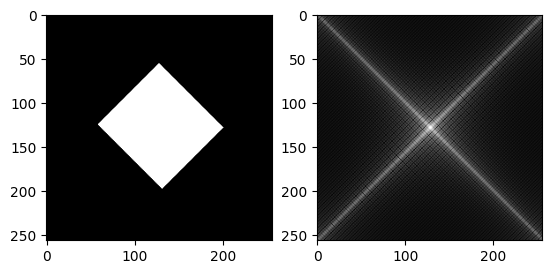

In [10]:
import numpy as np
import matplotlib.pyplot as plt


nx, ny = (256, 256)
x = np.linspace(0, nx-1, nx)
y = np.linspace(0, ny-1, ny)
i, j = np.meshgrid(x, y, sparse=True)
rotate_box = np.zeros((256,256),dtype= bool)
rotate_box = (i+j<329)&(i+j>182)&(i-j>-67)&(i-j<73)

plt.subplot(1,2,1)
plt.imshow(rotate_box,cmap = 'gray')

plt.subplot(1,2,2)
f = np.fft.fft2(rotate_box)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift)) # fourier spectrum
plt.imshow(magnitude_spectrum , cmap='gray')


## Exercise #2 cameraman.tif

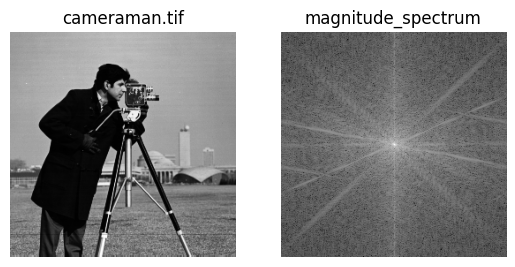

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('cameraman.tif',0)

f = np.fft.fft2(img)
f_shifted = np.fft.fftshift(f)
magnitude_spectrum = np.log(1 + np.abs(f_shifted))


show_image(image_list=[img, magnitude_spectrum],
           title_list=['cameraman.tif', 'magnitude_spectrum'])

## Exercise #3 frequency filtering
* LPF
* HPF

* Ideal LPF

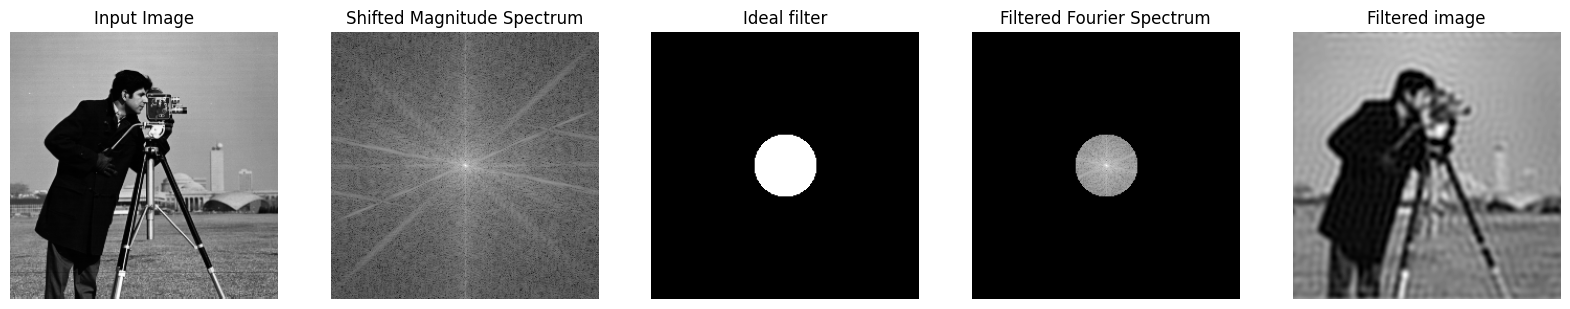

0.0 255.2468456897878


In [12]:
img = cv2.imread('cameraman.tif',0).astype(np.int16)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

D0 = 30
nx, ny = (256, 256)
x = np.linspace(-nx/2, nx/2-1, nx)
y = np.linspace(-ny/2, ny/2-1, ny)
i, j = np.meshgrid(x, y, sparse=True)
ideal_filter = np.ones((nx,ny),dtype=bool) # 0,1


ideal_filter = np.sqrt(i*i+j*j)<D0

img_ft_filter = fshift * ideal_filter
img_ft_filter_spectrum = np.log(1+np.abs(img_ft_filter))

f_ishift = np.fft.ifftshift(img_ft_filter)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
img_back[img_back<0] = 0
plt.figure(figsize=(20, 10))
show_image(image_list=[img, magnitude_spectrum, ideal_filter, img_ft_filter_spectrum, img_back],
           title_list=['Input Image', 'Shifted Magnitude Spectrum', 'Ideal filter', 'Filtered Fourier Spectrum', 'Filtered image'])
print(img_back.min(),img_back.max())

### 3.1 Butterworth LPF
* try different order
* try different cutoff freq

/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_53788/164970338.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  show_image(image_list=[img, magnitude_spectrum.astype(np.uint8), btw_filter, img_ft_filter_spectrum, img_back.astype(np.uint8)],


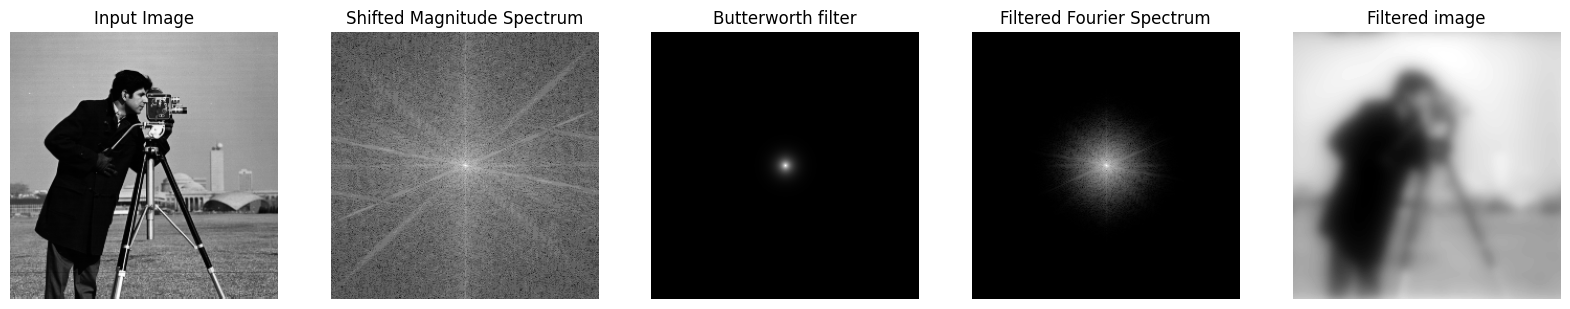

In [13]:
c = 200 # cutoff freq.
n = 20 # order

nx, ny = (256, 256)
x = np.linspace(-nx/2, nx/2-1, nx)
y = np.linspace(-ny/2, ny/2-1, ny)
btw = np.zeros((nx,ny),dtype=np.float32)
i, j = np.meshgrid(x, y, sparse=True)
btw_filter = 1/((1+np.sqrt(i**2+j**2)/c)**(2*n))

img = cv2.imread('cameraman.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))


img_ft_filter = fshift * btw_filter
img_ft_filter_spectrum = np.log(1+np.abs(img_ft_filter))

f_ishift = np.fft.ifftshift(img_ft_filter)
img_back = np.fft.ifft2(f_ishift)

plt.figure(figsize=(20, 10))

show_image(image_list=[img, magnitude_spectrum.astype(np.uint8), btw_filter, img_ft_filter_spectrum, img_back.astype(np.uint8)],
           title_list=['Input Image', 'Shifted Magnitude Spectrum', 'Butterworth filter', 'Filtered Fourier Spectrum', 'Filtered image'])

### 3.2 Gaussian LPF

/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_53788/4028365653.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  img_back = np.fft.ifft2(np.fft.ifftshift(img_ft_filter_spectrum)).astype(np.uint8)
/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_53788/4028365653.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  show_image(image_list=[img, magnitude_spectrum, gaussian_filter, img_ft_filter_spectrum.astype(np.uint8), img_back],


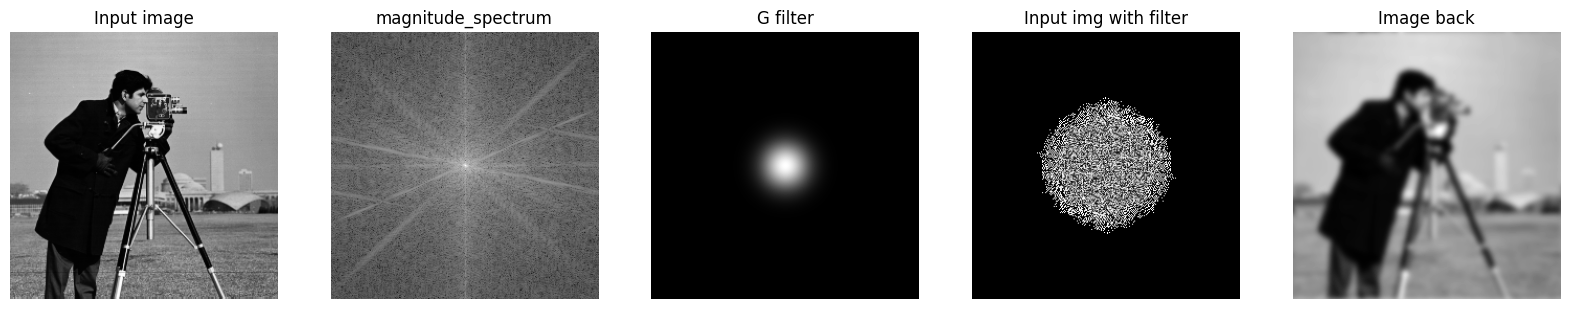

In [14]:
c = 15 # cutoff freq.


nx, ny = (256, 256)
x = np.linspace(-nx/2, nx/2-1, nx)
y = np.linspace(-ny/2, ny/2-1, ny)
gaussian_filter = np.zeros((nx,ny),dtype=np.float32)
i, j = np.meshgrid(x, y, sparse=True)


gaussian_filter = np.exp(-1 * (i**2 + j**2) / (2*c**2))

img = cv2.imread('cameraman.tif',0)
f = np.fft.fft2(img)
f_shifted = np.fft.fftshift(f)
magnitude_spectrum = np.log(1 + np.abs(f_shifted))

img_ft_filter_spectrum = gaussian_filter * f_shifted

img_back = np.fft.ifft2(np.fft.ifftshift(img_ft_filter_spectrum)).astype(np.uint8)

plt.figure(figsize=(20, 10))
show_image(image_list=[img, magnitude_spectrum, gaussian_filter, img_ft_filter_spectrum.astype(np.uint8), img_back],
           title_list=['Input image', 'magnitude_spectrum', 'G filter', 'Input img with filter', 'Image back'])


### 3.3 Select one of the HPF

/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_53788/349662978.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  img_back = np.fft.ifft2(np.fft.ifftshift(filtered_f)).astype(np.uint8)
/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_53788/349662978.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  show_image(image_list=[img, magnitude_spectrum, ideal_hpf, filtered_f.astype(np.uint8),img_back],


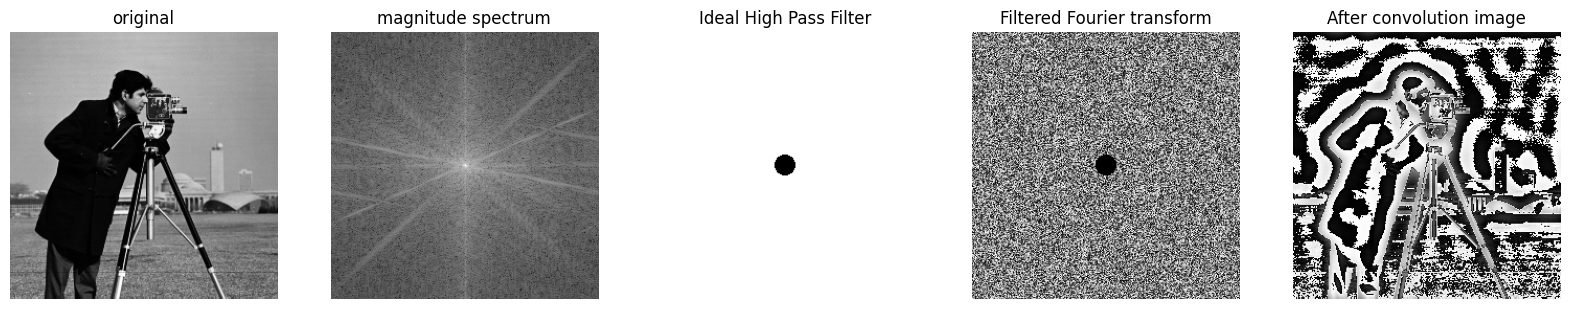

In [49]:
d0 = 10

img = cv2.imread('cameraman.tif',0)

nx, ny = img.shape
x = np.linspace(-nx//2, nx//2, nx)
y = np.linspace(-ny//2, ny//2, ny)

ideal_hpf = np.zeros_like(img, dtype=np.float32)
i,j = np.meshgrid(x, y, sparse=True)

ideal_hpf = 1 - (np.sqrt(i**2 + j**2) < d0)

f = np.fft.fft2(img)
f_shifted = np.fft.fftshift(f)
magnitude_spectrum = np.log(1 + np.abs(f_shifted))

filtered_f = f_shifted * ideal_hpf

img_back = np.fft.ifft2(np.fft.ifftshift(filtered_f)).astype(np.uint8)

plt.figure(figsize=(20, 10))

show_image(image_list=[img, magnitude_spectrum, ideal_hpf, filtered_f.astype(np.uint8),img_back],
           title_list=['original', 'magnitude spectrum', 'Ideal High Pass Filter', 'Filtered Fourier transform', 'After convolution image'])

### Can you enhance the moon in frequency domain?


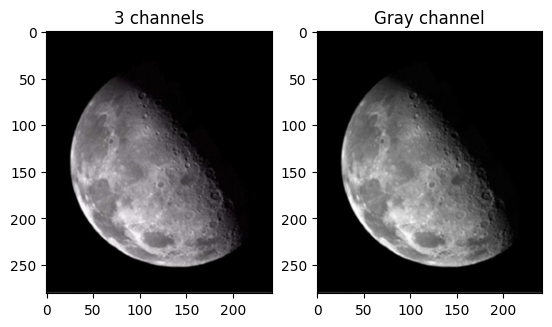

In [57]:
moon = cv2.imread('moon.png')
gray_moon = cv2.cvtColor(moon, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 1)
plt.imshow(moon)
plt.title('3 channels')
plt.subplot(1, 2, 2)
plt.imshow(gray_moon, cmap='gray')
plt.title('Gray channel')

plt.show()

/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_53788/1907824085.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  img_back = np.fft.ifft2(np.fft.ifftshift(filtered_f)).astype(np.uint8)
/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_53788/1907824085.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  show_image(image_list=[gray_moon, magnitude_spectrum, HPF, filtered_f.astype(np.uint8), img_back],


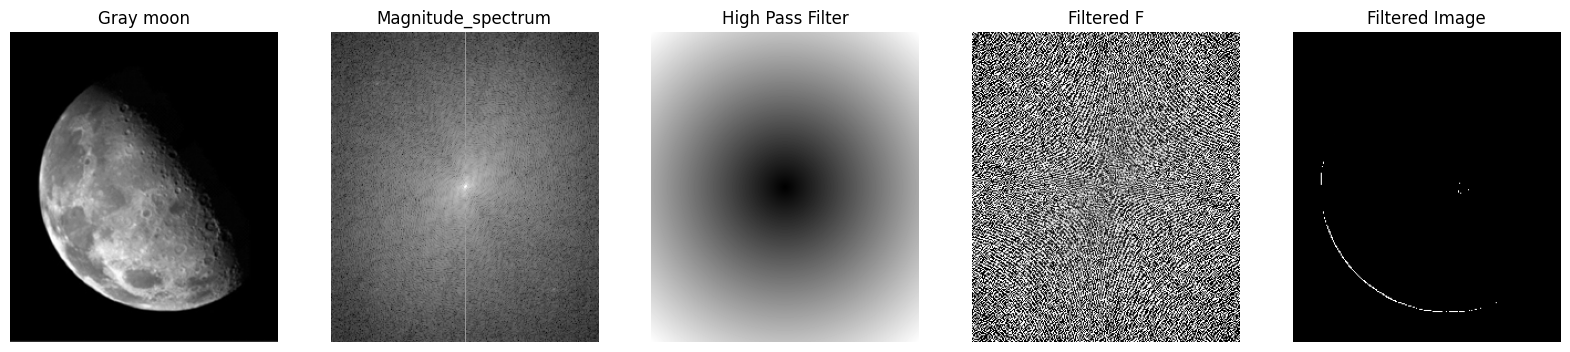

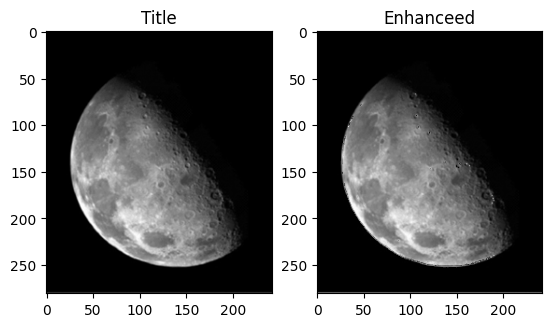

In [121]:
'''
    1. use HPF to get the details of image
    2. add the details part to the original image
'''

# guasian HPF
D0 = 36
HPF = np.zeros_like(gray_moon, dtype=np.float32)

ny, nx = gray_moon.shape
x = np.linspace(-nx//2, nx//2, nx)
y = np.linspace(-ny//2, ny//2, ny)
i, j = np.meshgrid(x, y, sparse=True)

HPF = 1 - np.exp(-(np.sqrt(i**2+j**2)/(2*D0**2)))

# fourier transform the image
f = np.fft.fft2(gray_moon)
f_shifted = np.fft.fftshift(f)
magnitude_spectrum = np.log(1 + np.abs(f_shifted))

# apply filter to image
filtered_f = f_shifted * HPF 

# convert the image back
img_back = np.fft.ifft2(np.fft.ifftshift(filtered_f)).astype(np.uint8)

plt.figure(figsize=(20, 10))
show_image(image_list=[gray_moon, magnitude_spectrum, HPF, filtered_f.astype(np.uint8), img_back],
           title_list=['Gray moon', 'Magnitude_spectrum', 'High Pass Filter', 'Filtered F', 'Filtered Image'])

enhanced_img = img_back*gray_moon + gray_moon
plt.subplot(1, 2, 2)
plt.imshow(enhanced_img, cmap='gray')
plt.title('Enhanceed')
plt.subplot(1, 2, 1)
plt.imshow(gray_moon, cmap='gray')
plt.title('Title')
plt.show()

/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_53788/2598285514.py:5: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  sharpening_filter = np.array([
/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_53788/2598285514.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  show_image(image_list=[gray_moon, magnitude_spectrum, spf_freq.astype(np.float32), (np.fft.fftshift(filtered_f)).astype(np.uint8), img_back],
/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_53788/2598285514.py:26: RuntimeWarning: invalid value encountered in cast
  show_image(image_list=[gray_moon, magnitude_spectrum, spf_freq.astype(np.float32), (np.fft.fftshift(filtered_f)).astype(np.uint8), img_back],


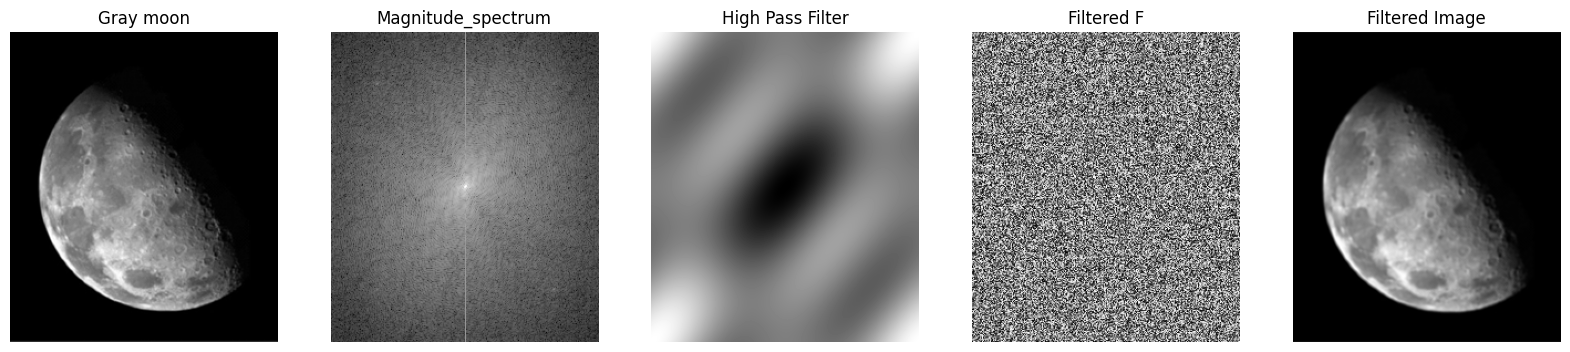

In [115]:
'''
    1. convert time-domain -> freq-domain
    2. multiply in freq-domain
    3. convert back
'''

sharpening_filter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=np.uint16)

spf_freq = np.zeros_like(gray_moon)
spf_freq[:3, :3] = sharpening_filter
spf_freq = np.fft.fft2(spf_freq)

# fourier transform the image
f = np.fft.fft2(gray_moon)
f_shifted = np.fft.fftshift(f)
magnitude_spectrum = np.log(1 + np.abs(f_shifted))

filtered_f = spf_freq * f

img_back = np.abs(np.fft.ifft2(filtered_f))
img_back = img_back/img_back.max() * 255

plt.figure(figsize=(20, 10))
show_image(image_list=[gray_moon, magnitude_spectrum, spf_freq.astype(np.float32), (np.fft.fftshift(filtered_f)).astype(np.uint8), img_back],
           title_list=['Gray moon', 'Magnitude_spectrum', 'High Pass Filter', 'Filtered F', 'Filtered Image'])
